In [1]:
# import required packages
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [2]:
# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

In [3]:
# Preprocess all train images
face_train_generator = train_data_gen.flow_from_directory(
        'data/train/face_train/',
        target_size=(38, 38),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical'
)

eyes_train_generator = train_data_gen.flow_from_directory(
        'data/train/eyes_train/',
        target_size=(30, 62),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical'
)

mouth_train_generator = train_data_gen.flow_from_directory(
        'data/train/mouth_train/',
        target_size=(30, 38),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical'
)

Found 776 images belonging to 7 classes.
Found 777 images belonging to 7 classes.
Found 769 images belonging to 7 classes.


In [4]:
# Preprocess all test images
face_valid_generator = validation_data_gen.flow_from_directory(
        'data/test/face_test/',
        target_size=(38, 38),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical'
)

eyes_valid_generator = validation_data_gen.flow_from_directory(
        'data/test/eyes_test/',
        target_size=(30, 62),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical'
)

mouth_valid_generator = validation_data_gen.flow_from_directory(
        'data/test/mouth_test/',
        target_size=(30, 38),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical'
)

Found 181 images belonging to 7 classes.
Found 181 images belonging to 7 classes.
Found 181 images belonging to 7 classes.


In [5]:
# create model structure
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(38, 38, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

cv2.ocl.setUseOpenCL(False)

emotion_model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001, decay=1e-6), metrics=['accuracy'])

In [6]:
emotion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 36, 36, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 17, 17, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 17, 17, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                   

In [7]:
# Train the neural network/model
emotion_model_info = emotion_model.fit_generator(
        face_train_generator,
        # steps_per_epoch=28709 // 64,
        steps_per_epoch=776 // 64,
        epochs=100,
        validation_data=face_valid_generator,
        # validation_steps=7178 // 64
        validation_steps=181 // 64
)

Epoch 1/100


C:\Users\ESPB\AppData\Local\Temp\ipykernel_15816\3899987995.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  emotion_model_info = emotion_model.fit_generator(




12/12 [==============================] - 2s 127ms/step - loss: 1.9415 - accuracy: 0.1728 - val_loss: 1.9572 - val_accuracy: 0.1562
Epoch 2/100
12/12 [==============================] - 1s 69ms/step - loss: 1.9315 - accuracy: 0.1615 - val_loss: 1.9597 - val_accuracy: 0.1250
Epoch 3/100
12/12 [==============================] - 1s 56ms/step - loss: 1.9254 - accuracy: 0.1840 - val_loss: 1.9489 - val_accuracy: 0.1250
Epoch 4/100
12/12 [==============================] - 1s 55ms/step - loss: 1.9003 - accuracy: 0.2079 - val_loss: 1.9474 - val_accuracy: 0.1016
Epoch 5/100
12/12 [==============================] - 1s 57ms/step - loss: 1.7943 - accuracy: 0.2739 - val_loss: 2.0278 - val_accuracy: 0.1328
Epoch 6/100
12/12 [==============================] - 1s 58ms/step - loss: 1.6756 - accuracy: 0.3132 - val_loss: 2.0431 - val_accuracy: 0.1562
Epoch 7/100
12/12 [==============================] - 1s 67ms/step - loss: 1.5819 - accuracy: 0.3371 - val_loss: 2.2276 - val_accuracy: 0.1484
Epoch 8/100
12/

Training: 0.9845505356788635
Validation: 0.3359375


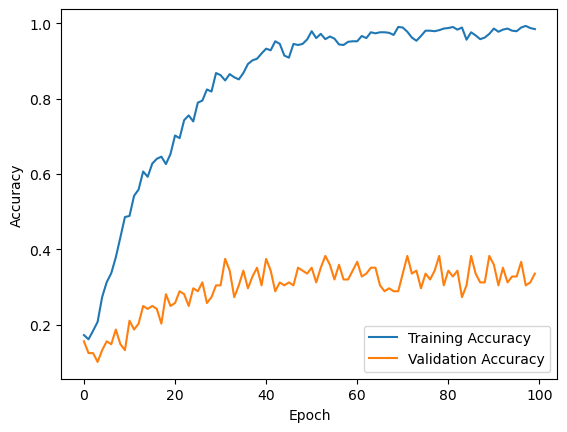

In [8]:
print("Training:", emotion_model_info.history['accuracy'][-1])
print("Validation:", emotion_model_info.history['val_accuracy'][-1])

plt.plot(emotion_model_info.history['accuracy'], label='Training Accuracy')
plt.plot(emotion_model_info.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [9]:
# create model structure 2
emotion_model2 = Sequential()

emotion_model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(30, 62, 1)))
emotion_model2.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model2.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model2.add(Dropout(0.25))

emotion_model2.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model2.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model2.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model2.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model2.add(Dropout(0.25))

emotion_model2.add(Flatten())
emotion_model2.add(Dense(1024, activation='relu'))
emotion_model2.add(Dropout(0.5))
emotion_model2.add(Dense(7, activation='softmax'))

cv2.ocl.setUseOpenCL(False)

emotion_model2.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001, decay=1e-6), metrics=['accuracy'])

In [10]:
# Train the neural network/model
emotion_model_info2 = emotion_model2.fit_generator(
        eyes_train_generator,
        # steps_per_epoch=28709 // 64,
        steps_per_epoch=777 // 64,
        epochs=100,
        validation_data=eyes_valid_generator,
        # validation_steps=7178 // 64
        validation_steps=181 // 64
)

Epoch 1/100


C:\Users\ESPB\AppData\Local\Temp\ipykernel_15816\768161460.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  emotion_model_info2 = emotion_model2.fit_generator(


12/12 [==============================] - 2s 144ms/step - loss: 1.9529 - accuracy: 0.1781 - val_loss: 1.9495 - val_accuracy: 0.1250
Epoch 2/100
12/12 [==============================] - 1s 62ms/step - loss: 1.9325 - accuracy: 0.1992 - val_loss: 1.9620 - val_accuracy: 0.1406
Epoch 3/100
12/12 [==============================] - 1s 70ms/step - loss: 1.9115 - accuracy: 0.1950 - val_loss: 1.9931 - val_accuracy: 0.1328
Epoch 4/100
12/12 [==============================] - 1s 74ms/step - loss: 1.8884 - accuracy: 0.2188 - val_loss: 1.9463 - val_accuracy: 0.1641
Epoch 5/100
12/12 [==============================] - 1s 66ms/step - loss: 1.8001 - accuracy: 0.2567 - val_loss: 1.9560 - val_accuracy: 0.2031
Epoch 6/100
12/12 [==============================] - 1s 74ms/step - loss: 1.6945 - accuracy: 0.3366 - val_loss: 1.9570 - val_accuracy: 0.1875
Epoch 7/100
12/12 [==============================] - 1s 75ms/step - loss: 1.6318 - accuracy: 0.3829 - val_loss: 1.9846 - val_accuracy: 0.2344
Epoch 8/100
12/12

Training: 0.9985975027084351
Validation: 0.296875


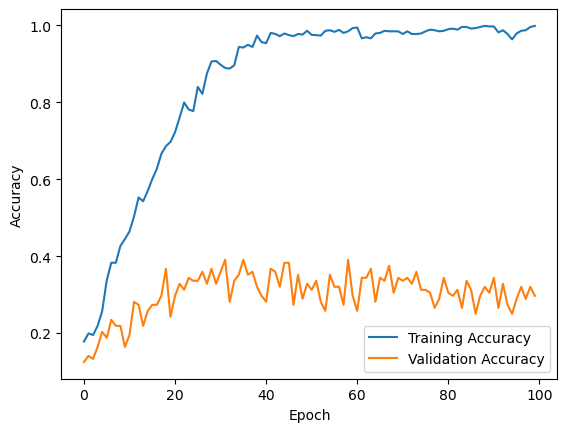

In [11]:
print("Training:", emotion_model_info2.history['accuracy'][-1])
print("Validation:", emotion_model_info2.history['val_accuracy'][-1])

plt.plot(emotion_model_info2.history['accuracy'], label='Training Accuracy')
plt.plot(emotion_model_info2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
# create model structure 2
emotion_model3 = Sequential()

emotion_model3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(30, 38, 1)))
emotion_model3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model3.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model3.add(Dropout(0.25))

emotion_model3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model3.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model3.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model3.add(Dropout(0.25))

emotion_model3.add(Flatten())
emotion_model3.add(Dense(1024, activation='relu'))
emotion_model3.add(Dropout(0.5))
emotion_model3.add(Dense(7, activation='softmax'))

cv2.ocl.setUseOpenCL(False)

emotion_model3.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001, decay=1e-6), metrics=['accuracy'])

In [13]:
# Train the neural network/model
emotion_model_info3 = emotion_model3.fit_generator(
        mouth_train_generator,
        # steps_per_epoch=28709 // 64,
        steps_per_epoch=769 // 64,
        epochs=100,
        validation_data=mouth_valid_generator,
        # validation_steps=7178 // 64
        validation_steps=181 // 64
)

C:\Users\ESPB\AppData\Local\Temp\ipykernel_15816\2297914698.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  emotion_model_info3 = emotion_model3.fit_generator(


Epoch 1/100
12/12 [==============================] - 2s 115ms/step - loss: 1.9345 - accuracy: 0.1929 - val_loss: 1.9637 - val_accuracy: 0.1016
Epoch 2/100
12/12 [==============================] - 1s 46ms/step - loss: 1.9245 - accuracy: 0.1915 - val_loss: 1.9522 - val_accuracy: 0.1250
Epoch 3/100
12/12 [==============================] - 1s 43ms/step - loss: 1.9345 - accuracy: 0.1943 - val_loss: 1.9628 - val_accuracy: 0.1562
Epoch 4/100
12/12 [==============================] - 1s 40ms/step - loss: 1.9078 - accuracy: 0.2227 - val_loss: 1.9664 - val_accuracy: 0.1250
Epoch 5/100
12/12 [==============================] - 1s 41ms/step - loss: 1.8839 - accuracy: 0.2539 - val_loss: 1.9482 - val_accuracy: 0.1953
Epoch 6/100
12/12 [==============================] - 1s 45ms/step - loss: 1.8099 - accuracy: 0.3007 - val_loss: 1.8638 - val_accuracy: 0.2188
Epoch 7/100
12/12 [==============================] - 1s 44ms/step - loss: 1.7291 - accuracy: 0.3177 - val_loss: 1.8693 - val_accuracy: 0.1953
Epoch

Training: 0.9687943458557129
Validation: 0.4765625


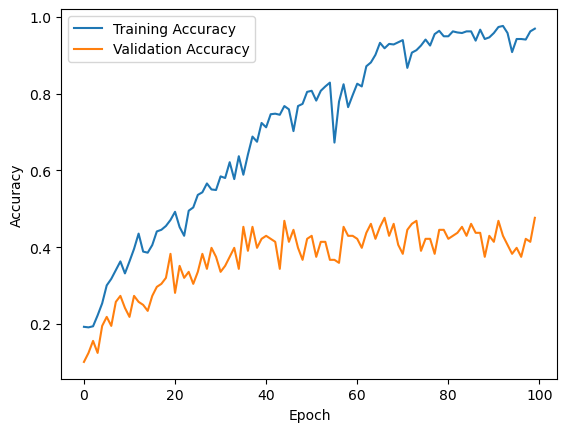

In [14]:
print("Training:", emotion_model_info3.history['accuracy'][-1])
print("Validation:", emotion_model_info3.history['val_accuracy'][-1])

plt.plot(emotion_model_info3.history['accuracy'], label='Training Accuracy')
plt.plot(emotion_model_info3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
last_accuracy_model1 = emotion_model_info.history['accuracy'][-1]
last_accuracy_model2 = emotion_model_info2.history['accuracy'][-1]
last_accuracy_model3 = emotion_model_info3.history['accuracy'][-1]

percentage_model1 = 100
percentage_model2 = 30
percentage_model3 = 30

combined_accuracy = (last_accuracy_model1 * percentage_model1 / 100) + (last_accuracy_model2 * percentage_model2 / 100) + (last_accuracy_model3 * percentage_model3 / 100)

combined_accuracy_percentage = combined_accuracy / (percentage_model1 + percentage_model2 + percentage_model3) * 100

print("Combined Accuracy:", combined_accuracy_percentage, "%")


Combined Accuracy: 0.9842300564050674 %


In [16]:
# # save model structure in json file
# model_json = emotion_model.to_json()
# with open("emotion_model.json", "w") as json_file:
#     json_file.write(model_json)

In [17]:
# # save trained model weight in .h5 file
# emotion_model.save_weights('emotion_model.h5')